### Import the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read the data

In [2]:
df=pd.read_csv("Order.csv", encoding='latin-1')
df

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship
0,BN-2011-7407039,01-01-2013,Ruby Patel,Stockholm,Sweden,North,Home Office,01-05-2013,Economy Plus,Stockholm,4
1,AZ-2011-9050313,01-03-2013,Summer Hayward,Southport,United Kingdom,North,Consumer,01-07-2013,Economy,England,4
2,AZ-2011-6674300,01-04-2013,Devin Huddleston,Valence,France,Central,Consumer,01-08-2013,Economy,Auvergne-Rhône-Alpes,4
3,BN-2011-2819714,01-04-2013,Mary Parker,Birmingham,United Kingdom,North,Corporate,01-09-2013,Economy,England,5
4,AZ-2011-617423,01-05-2013,Daniel Burke,Echirolles,France,Central,Home Office,01-07-2013,Priority,Auvergne-Rhône-Alpes,2
...,...,...,...,...,...,...,...,...,...,...,...
4112,AZ-2014-8174835,12-31-16,Eloise Sykes,Bielefeld,Germany,Central,Consumer,01-04-2017,Economy,North Rhine-Westphalia,4
4113,AZ-2014-766953,12-31-16,Jose Gambino,Maidenhead,United Kingdom,North,Corporate,01-05-2017,Economy,England,5
4114,AZ-2014-1412225,12-31-16,Leon Barnes,Worcester,United Kingdom,North,Consumer,01-01-2017,Priority,England,1
4115,AZ-2014-7604524,12-31-16,Rebecca Chamberlain,Hamburg,Germany,Central,Home Office,01-04-2017,Economy,Hamburg,4


In [3]:
df1=pd.read_json("Order_breakdown.json")
df1

,Order ID,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage
...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-766953,"Ikea Stackable Bookrack, Traditional",0.0,0.0,245,91,2,Furniture,Bookcases
8043,BN-2014-4140795,"BIC Pencil Sharpener, Fluorescent",0.5,15.0,30,-10,2,Office Supplies,Art
8044,BN-2014-4140795,"Avery Binder Covers, Recycled",0.5,11.5,23,-6,4,Office Supplies,Binders
8045,BN-2014-4140795,"StarTech Phone, Red",0.5,54.0,108,-19,3,Technology,Machines


### Combining the dataframe

In [4]:
df2=df.merge(df1, how='inner', on='Order ID')
df2

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,01-01-2013,Ruby Patel,Stockholm,Sweden,North,Home Office,01-05-2013,Economy Plus,Stockholm,4,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,01-03-2013,Summer Hayward,Southport,United Kingdom,North,Consumer,01-07-2013,Economy,England,4,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,01-04-2013,Devin Huddleston,Valence,France,Central,Consumer,01-08-2013,Economy,Auvergne-Rhône-Alpes,4,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,01-04-2013,Mary Parker,Birmingham,United Kingdom,North,Corporate,01-09-2013,Economy,England,5,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,01-04-2013,Mary Parker,Birmingham,United Kingdom,North,Corporate,01-09-2013,Economy,England,5,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-1412225,12-31-16,Leon Barnes,Worcester,United Kingdom,North,Consumer,01-01-2017,Priority,England,1,"Fellowes Shelving, Single Width",0.0,0.0,289,75,5,Office Supplies,Storage
8043,AZ-2014-7604524,12-31-16,Rebecca Chamberlain,Hamburg,Germany,Central,Home Office,01-04-2017,Economy,Hamburg,4,"Wilson Jones Index Tab, Economy",0.0,0.0,32,8,5,Office Supplies,Binders
8044,BN-2014-4140795,12-31-16,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,01-05-2017,Economy Plus,North Brabant,5,"BIC Pencil Sharpener, Fluorescent",0.5,15.0,30,-10,2,Office Supplies,Art
8045,BN-2014-4140795,12-31-16,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,01-05-2017,Economy Plus,North Brabant,5,"Avery Binder Covers, Recycled",0.5,11.5,23,-6,4,Office Supplies,Binders


### Displaying first 5 rows of dataset

In [5]:
df2.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,01-01-2013,Ruby Patel,Stockholm,Sweden,North,Home Office,01-05-2013,Economy Plus,Stockholm,4,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,01-03-2013,Summer Hayward,Southport,United Kingdom,North,Consumer,01-07-2013,Economy,England,4,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,01-04-2013,Devin Huddleston,Valence,France,Central,Consumer,01-08-2013,Economy,Auvergne-Rhône-Alpes,4,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,01-04-2013,Mary Parker,Birmingham,United Kingdom,North,Corporate,01-09-2013,Economy,England,5,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,01-04-2013,Mary Parker,Birmingham,United Kingdom,North,Corporate,01-09-2013,Economy,England,5,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage


### Displaying the last 5 rows of dataset

In [6]:
df2.tail()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
8042,AZ-2014-1412225,12-31-16,Leon Barnes,Worcester,United Kingdom,North,Consumer,01-01-2017,Priority,England,1,"Fellowes Shelving, Single Width",0.0,0.0,289,75,5,Office Supplies,Storage
8043,AZ-2014-7604524,12-31-16,Rebecca Chamberlain,Hamburg,Germany,Central,Home Office,01-04-2017,Economy,Hamburg,4,"Wilson Jones Index Tab, Economy",0.0,0.0,32,8,5,Office Supplies,Binders
8044,BN-2014-4140795,12-31-16,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,01-05-2017,Economy Plus,North Brabant,5,"BIC Pencil Sharpener, Fluorescent",0.5,15.0,30,-10,2,Office Supplies,Art
8045,BN-2014-4140795,12-31-16,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,01-05-2017,Economy Plus,North Brabant,5,"Avery Binder Covers, Recycled",0.5,11.5,23,-6,4,Office Supplies,Binders
8046,BN-2014-4140795,12-31-16,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,01-05-2017,Economy Plus,North Brabant,5,"StarTech Phone, Red",0.5,54.0,108,-19,3,Technology,Machines


### shape of dataset

In [7]:
df2.shape
# rows=8047, cols=19

(8047, 19)

### Print the concise summary of the dataset

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8047 entries, 0 to 8046
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order ID         8047 non-null   object 
 1   Order Date       8047 non-null   object 
 2   Customer Name    8047 non-null   object 
 3   City             8047 non-null   object 
 4   Country          8047 non-null   object 
 5   Region           8047 non-null   object 
 6   Segment          8047 non-null   object 
 7   Ship Date        8047 non-null   object 
 8   Ship Mode        8047 non-null   object 
 9   State            8047 non-null   object 
 10  Days to Ship     8047 non-null   int64  
 11  Product Name     8047 non-null   object 
 12  Discount         8047 non-null   float64
 13  Actual Discount  8047 non-null   float64
 14  Sales            8047 non-null   int64  
 15  Profit           8047 non-null   int64  
 16  Quantity         8047 non-null   int64  
 17  Category      

### Data Preprocessing

#### 1) Handling the null values

In [9]:
df_null=df2.isnull().sum()
df_null=df_null[df_null>0]
df_null

Series([], dtype: int64)

#### Inference:
There are no null values in any columns.

#### 2) Handling duplicate records in dataset

In [10]:
df2[df2.duplicated()]

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
2543,AZ-2012-5907386,8-30-14,Louie Knight,Mechelen,Belgium,Central,Consumer,09-06-2014,Economy,Antwerp,7,"Sanford Pens, Fluorescent",0.0,0.0,37,10,3,Office Supplies,Art
4066,AZ-2013-5637964,6-15-15,Cynthia Zielinski,Madrid,Spain,South,Home Office,6-22-15,Economy,Madrid,7,"Wilson Jones 3-Hole Punch, Economy",0.0,0.0,84,28,3,Office Supplies,Binders


In [11]:
df2.duplicated().sum()

2

#### Inference:-
There are 2 duplicate records in the dataset.

#### Drop the duplicate records

In [12]:
df2.drop_duplicates(inplace=True)

In [13]:
df2.shape

(8045, 19)

In [14]:
df.duplicated().sum()          
# duplicate records present in the data after dropping the duplicate records from data= 0

0

#### 3) Checking the datatypes

In [15]:
df2.dtypes

Order ID            object
Order Date          object
Customer Name       object
City                object
Country             object
Region              object
Segment             object
Ship Date           object
Ship Mode           object
State               object
Days to Ship         int64
Product Name        object
Discount           float64
Actual Discount    float64
Sales                int64
Profit               int64
Quantity             int64
Category            object
Sub-Category        object
dtype: object

In [16]:
df2

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,01-01-2013,Ruby Patel,Stockholm,Sweden,North,Home Office,01-05-2013,Economy Plus,Stockholm,4,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,01-03-2013,Summer Hayward,Southport,United Kingdom,North,Consumer,01-07-2013,Economy,England,4,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,01-04-2013,Devin Huddleston,Valence,France,Central,Consumer,01-08-2013,Economy,Auvergne-Rhône-Alpes,4,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,01-04-2013,Mary Parker,Birmingham,United Kingdom,North,Corporate,01-09-2013,Economy,England,5,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,01-04-2013,Mary Parker,Birmingham,United Kingdom,North,Corporate,01-09-2013,Economy,England,5,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-1412225,12-31-16,Leon Barnes,Worcester,United Kingdom,North,Consumer,01-01-2017,Priority,England,1,"Fellowes Shelving, Single Width",0.0,0.0,289,75,5,Office Supplies,Storage
8043,AZ-2014-7604524,12-31-16,Rebecca Chamberlain,Hamburg,Germany,Central,Home Office,01-04-2017,Economy,Hamburg,4,"Wilson Jones Index Tab, Economy",0.0,0.0,32,8,5,Office Supplies,Binders
8044,BN-2014-4140795,12-31-16,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,01-05-2017,Economy Plus,North Brabant,5,"BIC Pencil Sharpener, Fluorescent",0.5,15.0,30,-10,2,Office Supplies,Art
8045,BN-2014-4140795,12-31-16,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,01-05-2017,Economy Plus,North Brabant,5,"Avery Binder Covers, Recycled",0.5,11.5,23,-6,4,Office Supplies,Binders


In [17]:
df2.describe(percentiles=[0, 0.05, 0.1, 0.2, 0.25, 0.3, 0.5, 0.7, 0.75, 0.9, 0.95, 1])

,Days to Ship,Discount,Actual Discount,Sales,Profit,Quantity
count,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000
mean,4.006588,0.110075,29.800485,291.903170,35.202237,3.772281
std,1.740808,0.181787,88.827454,485.258616,178.147747,2.203610
min,0.000000,0.000000,0.000000,3.000000,-3060.000000,1.000000
0%,0.000000,0.000000,0.000000,3.000000,-3060.000000,1.000000
5%,0.000000,0.000000,0.000000,17.000000,-93.000000,1.000000
10%,2.000000,0.000000,0.000000,25.000000,-34.600000,2.000000
20%,2.000000,0.000000,0.000000,41.000000,-3.000000,2.000000
25%,3.000000,0.000000,0.000000,48.000000,1.000000,2.000000
30%,3.000000,0.000000,0.000000,57.000000,3.000000,2.000000


In [18]:
cat_cols=df2.select_dtypes(include='object').columns
num_cols=df2.select_dtypes(include='number').columns

#### Outlier Clipping

<AxesSubplot:xlabel='Quantity'>

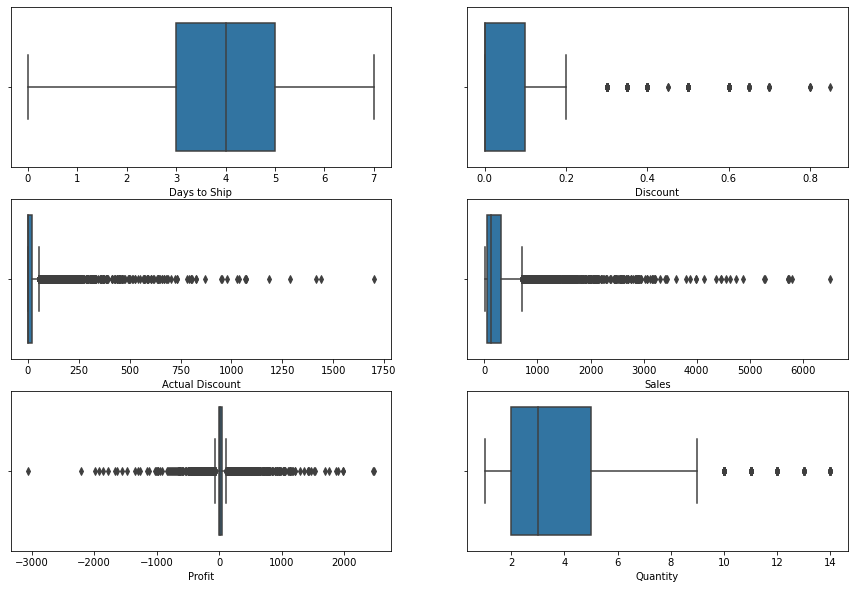

In [19]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharey=True)
sns.boxplot(df2['Days to Ship'], ax=ax1)
sns.boxplot(df2['Discount'], ax=ax2)
sns.boxplot(df2['Actual Discount'], ax=ax3)
sns.boxplot(df2['Sales'], ax=ax4)
sns.boxplot(df2['Profit'], ax=ax5)
sns.boxplot(df2['Quantity'], ax=ax6)

In [20]:
for i in num_cols:
    q1=df2[i].quantile(0.25)
    q2=df2[i].quantile(0.50)
    q3=df2[i].quantile(0.75)
    IQR=q3-q1
    upper_range=q3+1.5*IQR
    lower_range=q1-1.5*IQR
    df2[i]=np.where((df2[i]>upper_range), upper_range, df2[i])
    df2[i]=np.where((df2[i]<lower_range), lower_range, df2[i])

<AxesSubplot:xlabel='Quantity'>

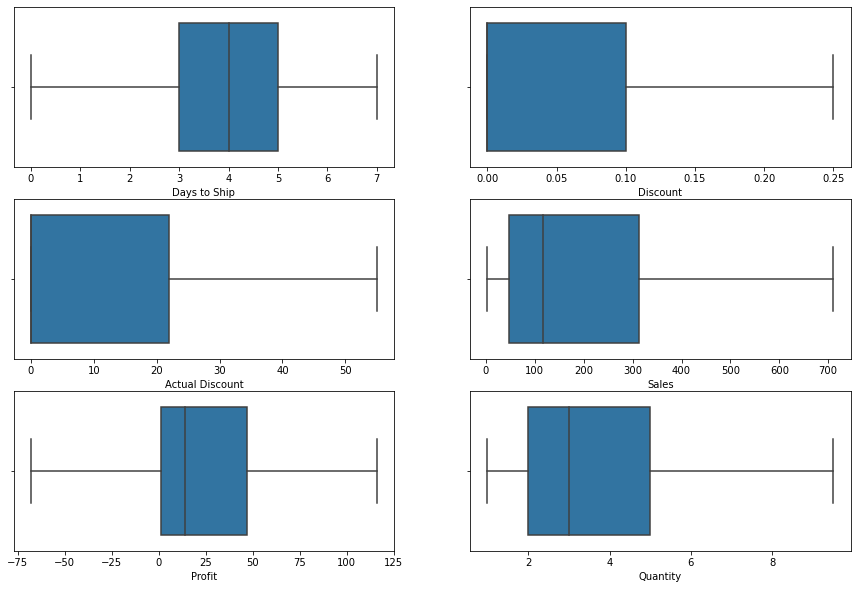

In [21]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharey=True)
sns.boxplot(df2['Days to Ship'], ax=ax1)
sns.boxplot(df2['Discount'], ax=ax2)
sns.boxplot(df2['Actual Discount'], ax=ax3)
sns.boxplot(df2['Sales'], ax=ax4)
sns.boxplot(df2['Profit'], ax=ax5)
sns.boxplot(df2['Quantity'], ax=ax6)

### EDA

#### Find the customer name who has ordered the product greater than 20 and depict it on bar chart

In [22]:
customer_20=df2['Customer Name'].value_counts()
customer_20=customer_20[customer_20>20]
customer_20

Joel Peters            32
Jose Gambino           30
Isaac David            29
Angie Massengill       28
Lori Miller            27
Owen Howell            27
Lola Hughes            26
Mark Washington        26
Michael Watkins        26
Minnie Cash            25
Rory Gunson            25
Alexandra Macdonald    25
Ella Dwyer-Gray        25
Rita McCann            25
Chloe Miller           24
Evie Flockhart         24
Kayla Tearle           24
Isabelle Torpy         23
Patricia Smith         23
Nicholas Carey         23
Elijah Sodeman         23
Jessica Paramor        22
Bettie Lang            22
Jasmine Slater         22
Aaron Bootman          22
Tia Metcalfe           22
Maynard Moorman        22
Thomas Thompson        22
John Kemp              22
Hayden Perkins         22
Georgina Garner        21
Max Ronald             21
Louis Dominguez        21
Terence Welch          21
Maya Pamphlett         21
Lilly Le Grand         21
Eve Spencer            21
Chelsea Bannister      21
Philip Newso

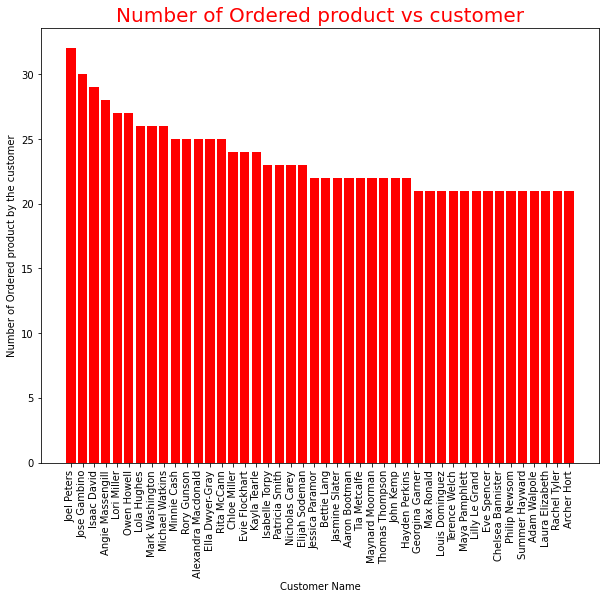

In [23]:
plt.figure(figsize=(10, 8))
plt.bar(customer_20.index, customer_20, color='red')
plt.title("Number of Ordered product vs customer", c='red', size=20)
plt.xlabel('Customer Name')
plt.ylabel('Number of Ordered product by the customer')
plt.xticks(rotation=90)
plt.show()

#### Inference :-
'Joel Peters' has ordered highest product. 

#### Find the product name which has been delivered in atleast 6 days from shipping days

In [24]:
Product_Name_6=df2[df2['Days to Ship']>=6]['Product Name']
Product_Name_6

10                         Ikea Classic Bookcase, Metal
11                      Binney & Smith Sketch Pad, Blue
19                 Ikea Stackable Bookrack, Traditional
20                          Binney & Smith Canvas, Blue
21                               Ibico Index Tab, Clear
                             ...                       
7988                Harbour Creations Bag Chairs, Black
7994    GlobeWeis Peel and Seal, with clear poly window
7995                         Eldon Shelving, Wire Frame
8003              Kraft Mailers, with clear poly window
8032                               Acco Binder, Economy
Name: Product Name, Length: 1537, dtype: object

#### find the total number of product ordered by customer per day 

In [25]:
Total_Quantity_per_day=df2.groupby(df2['Order Date'])['Quantity'].sum()
Total_Quantity_per_day

Order Date
01-01-2013     3.0
01-01-2015    33.0
01-01-2016    30.0
01-02-2014    10.0
01-02-2015    13.0
              ... 
9-29-16       29.0
9-30-13       37.0
9-30-14       41.0
9-30-15        6.0
9-30-16       33.5
Name: Quantity, Length: 1214, dtype: float64

In [26]:
df2

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,01-01-2013,Ruby Patel,Stockholm,Sweden,North,Home Office,01-05-2013,Economy Plus,Stockholm,4.0,"Enermax Note Cards, Premium",0.25,22.5,45.0,-26.0,3.0,Office Supplies,Paper
1,AZ-2011-9050313,01-03-2013,Summer Hayward,Southport,United Kingdom,North,Consumer,01-07-2013,Economy,England,4.0,"Dania Corner Shelving, Traditional",0.00,0.0,710.5,116.0,7.0,Furniture,Bookcases
2,AZ-2011-6674300,01-04-2013,Devin Huddleston,Valence,France,Central,Consumer,01-08-2013,Economy,Auvergne-Rhône-Alpes,4.0,"Binney & Smith Sketch Pad, Easy-Erase",0.00,0.0,140.0,21.0,3.0,Office Supplies,Art
3,BN-2011-2819714,01-04-2013,Mary Parker,Birmingham,United Kingdom,North,Corporate,01-09-2013,Economy,England,5.0,"Boston Markers, Easy-Erase",0.25,13.5,27.0,-22.0,2.0,Office Supplies,Art
4,BN-2011-2819714,01-04-2013,Mary Parker,Birmingham,United Kingdom,North,Corporate,01-09-2013,Economy,England,5.0,"Eldon Folders, Single Width",0.25,8.5,17.0,-1.0,2.0,Office Supplies,Storage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-1412225,12-31-16,Leon Barnes,Worcester,United Kingdom,North,Consumer,01-01-2017,Priority,England,1.0,"Fellowes Shelving, Single Width",0.00,0.0,289.0,75.0,5.0,Office Supplies,Storage
8043,AZ-2014-7604524,12-31-16,Rebecca Chamberlain,Hamburg,Germany,Central,Home Office,01-04-2017,Economy,Hamburg,4.0,"Wilson Jones Index Tab, Economy",0.00,0.0,32.0,8.0,5.0,Office Supplies,Binders
8044,BN-2014-4140795,12-31-16,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,01-05-2017,Economy Plus,North Brabant,5.0,"BIC Pencil Sharpener, Fluorescent",0.25,15.0,30.0,-10.0,2.0,Office Supplies,Art
8045,BN-2014-4140795,12-31-16,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,01-05-2017,Economy Plus,North Brabant,5.0,"Avery Binder Covers, Recycled",0.25,11.5,23.0,-6.0,4.0,Office Supplies,Binders


#### find Region wise mean of Discount, mean of Actual Discount, mean of Sales and mean of Profit

In [27]:
df2.groupby(df2['Region'])[['Discount', 'Actual Discount', 'Sales', 'Profit']].mean()

,Discount,Actual Discount,Sales,Profit
Region,,,,
Central,0.065220,14.299808,224.376384,26.109379
North,0.083573,11.552126,206.678355,21.730536
South,0.062521,11.792758,217.035931,21.865672


#### find avg delivery time according to ship mode and depict it on pie chart

In [28]:
Avg_Delivery_time=df2.groupby([df2['Ship Mode']])['Days to Ship'].mean()
Avg_Delivery_time

Ship Mode
Economy         5.029012
Economy Plus    3.236478
Immediate       0.046948
Priority        2.246364
Name: Days to Ship, dtype: float64

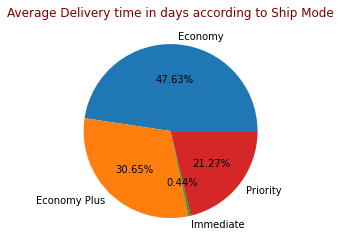

In [29]:
plt.pie(labels=Avg_Delivery_time.index, x=Avg_Delivery_time, autopct='%.2f%%')
plt.title("Average Delivery time in days according to Ship Mode", color='maroon')
plt.show()

#### find country , state and city wise,the total number of quantity ordered by customer per day

In [30]:
df2.groupby(['Order Date', 'Country', 'State', 'City'])['Quantity'].sum()

Order Date  Country         State                                City     
01-01-2013  Sweden          Stockholm                            Stockholm     3.0
01-01-2015  Belgium         Antwerp                              Antwerp      10.0
                            Hainaut                              Charleroi     2.0
            France          Aquitaine-Limousin-Poitou-Charentes  Lormont      11.0
                            Languedoc-Roussillon-Midi-Pyrénées   Toulouse      7.0
                                                                              ... 
9-30-16     Germany         Hesse                                Darmstadt    10.0
            Italy           Emilia-Romagna                       Ravenna       3.0
                            Lazio                                Rome          8.0
            United Kingdom  England                              Sale          9.5
                            Scotland                             Glasgow       3.0
Name: Quanti

#### find the number of orders ordered by a customer

In [31]:
df2['Customer Name'].value_counts()

Joel Peters         32
Jose Gambino        30
Isaac David         29
Angie Massengill    28
Lori Miller         27
                    ..
Audry Smith          1
Dakota Baynes        1
Jodie Garner         1
Max Baker            1
Jay Collier          1
Name: Customer Name, Length: 792, dtype: int64

In [32]:
df2['Order Date']=pd.to_datetime(df2['Order Date'])
df2['Ship Date']=pd.to_datetime(df2['Ship Date'])

In [33]:
df2.dtypes

Order ID                   object
Order Date         datetime64[ns]
Customer Name              object
City                       object
Country                    object
Region                     object
Segment                    object
Ship Date          datetime64[ns]
Ship Mode                  object
State                      object
Days to Ship              float64
Product Name               object
Discount                  float64
Actual Discount           float64
Sales                     float64
Profit                    float64
Quantity                  float64
Category                   object
Sub-Category               object
dtype: object

In [34]:
df2

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,2013-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2013-01-05,Economy Plus,Stockholm,4.0,"Enermax Note Cards, Premium",0.25,22.5,45.0,-26.0,3.0,Office Supplies,Paper
1,AZ-2011-9050313,2013-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2013-01-07,Economy,England,4.0,"Dania Corner Shelving, Traditional",0.00,0.0,710.5,116.0,7.0,Furniture,Bookcases
2,AZ-2011-6674300,2013-01-04,Devin Huddleston,Valence,France,Central,Consumer,2013-01-08,Economy,Auvergne-Rhône-Alpes,4.0,"Binney & Smith Sketch Pad, Easy-Erase",0.00,0.0,140.0,21.0,3.0,Office Supplies,Art
3,BN-2011-2819714,2013-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2013-01-09,Economy,England,5.0,"Boston Markers, Easy-Erase",0.25,13.5,27.0,-22.0,2.0,Office Supplies,Art
4,BN-2011-2819714,2013-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2013-01-09,Economy,England,5.0,"Eldon Folders, Single Width",0.25,8.5,17.0,-1.0,2.0,Office Supplies,Storage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-1412225,2016-12-31,Leon Barnes,Worcester,United Kingdom,North,Consumer,2017-01-01,Priority,England,1.0,"Fellowes Shelving, Single Width",0.00,0.0,289.0,75.0,5.0,Office Supplies,Storage
8043,AZ-2014-7604524,2016-12-31,Rebecca Chamberlain,Hamburg,Germany,Central,Home Office,2017-01-04,Economy,Hamburg,4.0,"Wilson Jones Index Tab, Economy",0.00,0.0,32.0,8.0,5.0,Office Supplies,Binders
8044,BN-2014-4140795,2016-12-31,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,2017-01-05,Economy Plus,North Brabant,5.0,"BIC Pencil Sharpener, Fluorescent",0.25,15.0,30.0,-10.0,2.0,Office Supplies,Art
8045,BN-2014-4140795,2016-12-31,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,2017-01-05,Economy Plus,North Brabant,5.0,"Avery Binder Covers, Recycled",0.25,11.5,23.0,-6.0,4.0,Office Supplies,Binders


#### Calculate the number of days required to ship the product from ship date

In [35]:
Required_days_to_ship_the_product_from_ship_date =(df2['Ship Date']-df2['Order Date'])/np.timedelta64(1, 'D')
Required_days_to_ship_the_product_from_ship_date

0       4.0
1       4.0
2       4.0
3       5.0
4       5.0
       ... 
8042    1.0
8043    4.0
8044    5.0
8045    5.0
8046    5.0
Length: 8045, dtype: float64

In [36]:
df2['City'].value_counts()

London                219
Vienna                196
Berlin                177
Madrid                149
Stockholm             124
                     ... 
Cercola                 1
Fareham                 1
Tremblay-en-France      1
Guimarães               1
Sagunto                 1
Name: City, Length: 999, dtype: int64

In [37]:
df2['Discount'].value_counts()

0.00    4907
0.25    1426
0.10    1315
0.15     287
0.20     110
Name: Discount, dtype: int64

In [38]:
df2['Order_Year']= df2['Order Date'].dt.year
df2['Order_Month']= df2['Order Date'].dt.month
df2['Order_day']= df2['Order Date'].dt.day

In [39]:
df2['Ship_Year']= df2['Ship Date'].dt.year
df2['Ship_Month']= df2['Ship Date'].dt.month
df2['Ship_day']= df2['Ship Date'].dt.day

In [40]:
df2

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,...,Profit,Quantity,Category,Sub-Category,Order_Year,Order_Month,Order_day,Ship_Year,Ship_Month,Ship_day
0,BN-2011-7407039,2013-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2013-01-05,Economy Plus,Stockholm,...,-26.0,3.0,Office Supplies,Paper,2013,1,1,2013,1,5
1,AZ-2011-9050313,2013-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2013-01-07,Economy,England,...,116.0,7.0,Furniture,Bookcases,2013,1,3,2013,1,7
2,AZ-2011-6674300,2013-01-04,Devin Huddleston,Valence,France,Central,Consumer,2013-01-08,Economy,Auvergne-Rhône-Alpes,...,21.0,3.0,Office Supplies,Art,2013,1,4,2013,1,8
3,BN-2011-2819714,2013-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2013-01-09,Economy,England,...,-22.0,2.0,Office Supplies,Art,2013,1,4,2013,1,9
4,BN-2011-2819714,2013-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2013-01-09,Economy,England,...,-1.0,2.0,Office Supplies,Storage,2013,1,4,2013,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-1412225,2016-12-31,Leon Barnes,Worcester,United Kingdom,North,Consumer,2017-01-01,Priority,England,...,75.0,5.0,Office Supplies,Storage,2016,12,31,2017,1,1
8043,AZ-2014-7604524,2016-12-31,Rebecca Chamberlain,Hamburg,Germany,Central,Home Office,2017-01-04,Economy,Hamburg,...,8.0,5.0,Office Supplies,Binders,2016,12,31,2017,1,4
8044,BN-2014-4140795,2016-12-31,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,2017-01-05,Economy Plus,North Brabant,...,-10.0,2.0,Office Supplies,Art,2016,12,31,2017,1,5
8045,BN-2014-4140795,2016-12-31,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,2017-01-05,Economy Plus,North Brabant,...,-6.0,4.0,Office Supplies,Binders,2016,12,31,2017,1,5


In [41]:
Product_Type=[]
for i in df2['Product Name'].str.split().values:
   Product_Type.append(i[-1])

In [42]:
a=np.array(Product_Type).reshape(8045, 1)
a

array([['Premium'],
       ['Traditional'],
       ['Easy-Erase'],
       ...,
       ['Fluorescent'],
       ['Recycled'],
       ['Red']], dtype='<U13')

In [43]:
df2['Product Type']=a

In [44]:
df2

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,...,Quantity,Category,Sub-Category,Order_Year,Order_Month,Order_day,Ship_Year,Ship_Month,Ship_day,Product Type
0,BN-2011-7407039,2013-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2013-01-05,Economy Plus,Stockholm,...,3.0,Office Supplies,Paper,2013,1,1,2013,1,5,Premium
1,AZ-2011-9050313,2013-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2013-01-07,Economy,England,...,7.0,Furniture,Bookcases,2013,1,3,2013,1,7,Traditional
2,AZ-2011-6674300,2013-01-04,Devin Huddleston,Valence,France,Central,Consumer,2013-01-08,Economy,Auvergne-Rhône-Alpes,...,3.0,Office Supplies,Art,2013,1,4,2013,1,8,Easy-Erase
3,BN-2011-2819714,2013-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2013-01-09,Economy,England,...,2.0,Office Supplies,Art,2013,1,4,2013,1,9,Easy-Erase
4,BN-2011-2819714,2013-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2013-01-09,Economy,England,...,2.0,Office Supplies,Storage,2013,1,4,2013,1,9,Width
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-1412225,2016-12-31,Leon Barnes,Worcester,United Kingdom,North,Consumer,2017-01-01,Priority,England,...,5.0,Office Supplies,Storage,2016,12,31,2017,1,1,Width
8043,AZ-2014-7604524,2016-12-31,Rebecca Chamberlain,Hamburg,Germany,Central,Home Office,2017-01-04,Economy,Hamburg,...,5.0,Office Supplies,Binders,2016,12,31,2017,1,4,Economy
8044,BN-2014-4140795,2016-12-31,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,2017-01-05,Economy Plus,North Brabant,...,2.0,Office Supplies,Art,2016,12,31,2017,1,5,Fluorescent
8045,BN-2014-4140795,2016-12-31,Daniel Hamilton,Eindhoven,Netherlands,Central,Home Office,2017-01-05,Economy Plus,North Brabant,...,4.0,Office Supplies,Binders,2016,12,31,2017,1,5,Recycled


In [45]:
df2['Product Type'].value_counts()

Blue             513
Durable          440
Color            410
Recycled         396
Clear            306
Easy-Erase       304
Fluorescent      286
Width            281
Economy          271
Black            269
Industrial       262
Pack             252
Frame            240
Red              233
Erganomic        224
Adjustable       207
Metal            161
White            156
Size             122
Traditional      117
ID               117
Cordless         116
Sizes            114
Premium          106
Grip             103
Set              102
Laser            102
Pine             100
VoIP              98
11                98
Security-Tint     97
Bluetooth         95
Speed             95
Multicolor        93
Compatible        92
50                91
Mobile            89
Digital           88
USB               86
High-Speed        83
Wireless          80
Programmable      78
Steel             75
Serrated          74
Alphabetical      71
window            62
Silver            59
Two          

In [46]:
counts=df2['Product Type'].value_counts()
thresold=300
counts[counts<thresold].index

Index(['Fluorescent', 'Width', 'Economy', 'Black', 'Industrial', 'Pack',
       'Frame', 'Red', 'Erganomic', 'Adjustable', 'Metal', 'White', 'Size',
       'Traditional', 'ID', 'Cordless', 'Sizes', 'Premium', 'Grip', 'Set',
       'Laser', 'Pine', 'VoIP', '11', 'Security-Tint', 'Bluetooth', 'Speed',
       'Multicolor', 'Compatible', '50', 'Mobile', 'Digital', 'USB',
       'High-Speed', 'Wireless', 'Programmable', 'Steel', 'Serrated',
       'Alphabetical', 'window', 'Silver', 'Two', 'Height', 'Assembled',
       'Storage', 'Rectangular'],
      dtype='object')

In [47]:
df2['Product Type']=np.where(df2['Product Type'].isin(counts[counts<thresold].index), 'unknown', df2['Product Type'])

In [48]:
df2['Product Type'].value_counts()

unknown       5676
Blue           513
Durable        440
Color          410
Recycled       396
Clear          306
Easy-Erase     304
Name: Product Type, dtype: int64

In [49]:
df2['City'].value_counts()

London                219
Vienna                196
Berlin                177
Madrid                149
Stockholm             124
                     ... 
Cercola                 1
Fareham                 1
Tremblay-en-France      1
Guimarães               1
Sagunto                 1
Name: City, Length: 999, dtype: int64

In [50]:
counts=df2['City'].value_counts()
thresold=125
counts[counts<thresold].index

Index(['Stockholm', 'Paris', 'Rome', 'Hamburg', 'Milan', 'Dublin',
       'Birmingham', 'Barcelona', 'Marseille', 'Munich',
       ...
       'Mouscron', 'Moissy-Cramayel', 'Barletta', 'Denain', 'Schiffweiler',
       'Cercola', 'Fareham', 'Tremblay-en-France', 'Guimarães', 'Sagunto'],
      dtype='object', length=995)

In [51]:
df2['City']=np.where(df2['City'].isin(counts[counts<thresold].index), 'unknown', df2['City'])

In [52]:
df2['City'].value_counts()

unknown    7304
London      219
Vienna      196
Berlin      177
Madrid      149
Name: City, dtype: int64

In [53]:
df2.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'City', 'Country', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Days to Ship',
       'Product Name', 'Discount', 'Actual Discount', 'Sales', 'Profit',
       'Quantity', 'Category', 'Sub-Category', 'Order_Year', 'Order_Month',
       'Order_day', 'Ship_Year', 'Ship_Month', 'Ship_day', 'Product Type'],
      dtype='object')

In [54]:
df2['Country'].value_counts()

France            1916
Germany           1640
United Kingdom    1314
Italy              979
Spain              760
Netherlands        393
Austria            264
Sweden             203
Belgium            134
Ireland            100
Switzerland         78
Norway              70
Portugal            70
Finland             64
Denmark             60
Name: Country, dtype: int64

In [55]:
counts=df2['Country'].value_counts()
thresold=300
counts[counts<thresold].index

Index(['Austria', 'Sweden', 'Belgium', 'Ireland', 'Switzerland', 'Norway',
       'Portugal', 'Finland', 'Denmark'],
      dtype='object')

In [56]:
df2['Country']=np.where(df2['Country'].isin(counts[counts<thresold].index), 'unknown', df2['Country'])

In [57]:
df2['Country'].value_counts()

France            1916
Germany           1640
United Kingdom    1314
unknown           1043
Italy              979
Spain              760
Netherlands        393
Name: Country, dtype: int64

In [58]:
df2['Region'].value_counts()

Central    4425
North      1811
South      1809
Name: Region, dtype: int64

In [59]:
df2['Segment'].value_counts()

Consumer       4173
Corporate      2514
Home Office    1358
Name: Segment, dtype: int64

In [60]:
df2['Ship Mode'].value_counts()

Economy         4860
Economy Plus    1590
Priority        1169
Immediate        426
Name: Ship Mode, dtype: int64

In [61]:
df2['State'].value_counts()

England                       1187
Ile-de-France                  673
North Rhine-Westphalia         572
Provence-Alpes-Côte d'Azur     250
Madrid                         198
                              ... 
Södermanland                     1
Zeeland                          1
Aveiro                           1
Extremadura                      1
Setúbal                          1
Name: State, Length: 127, dtype: int64

In [62]:
counts=df2['State'].value_counts()
thresold=200
counts[counts<thresold].index

Index(['Madrid', 'Vienna', 'Berlin', 'Languedoc-Roussillon-Midi-Pyrénées',
       'Auvergne-Rhône-Alpes', 'Stockholm', 'Lazio', 'Bavaria',
       'Nord-Pas-de-Calais-Picardie', 'Baden-Württemberg',
       ...
       'Central Jutland', 'Liège', 'Hedmark', 'Galway', 'Basilicata',
       'Södermanland', 'Zeeland', 'Aveiro', 'Extremadura', 'Setúbal'],
      dtype='object', length=123)

In [63]:
df2['State']=np.where(df2['State'].isin(counts[counts<thresold].index), 'unknown', df2['State'])

In [64]:
df2['State'].value_counts()

unknown                       5363
England                       1187
Ile-de-France                  673
North Rhine-Westphalia         572
Provence-Alpes-Côte d'Azur     250
Name: State, dtype: int64

In [65]:
df2['Category'].value_counts()

Office Supplies    5284
Technology         1523
Furniture          1238
Name: Category, dtype: int64

In [66]:
df2['Sub-Category'].value_counts()

Art            1151
Binders        1058
Storage        1051
Phones          453
Bookcases       391
Furnishings     389
Chairs          383
Paper           374
Labels          372
Accessories     368
Copiers         367
Fasteners       350
Supplies        347
Envelopes       346
Machines        335
Appliances      235
Tables           75
Name: Sub-Category, dtype: int64

In [67]:
counts=df2['Sub-Category'].value_counts()
thresold=400
counts[counts<thresold].index

Index(['Bookcases', 'Furnishings', 'Chairs', 'Paper', 'Labels', 'Accessories',
       'Copiers', 'Fasteners', 'Supplies', 'Envelopes', 'Machines',
       'Appliances', 'Tables'],
      dtype='object')

In [68]:
df2['Sub-Category']=np.where(df2['Sub-Category'].isin(counts[counts<thresold].index), 'unknown', df2['Sub-Category'])

In [69]:
df2['Sub-Category'].value_counts()

unknown    4332
Art        1151
Binders    1058
Storage    1051
Phones      453
Name: Sub-Category, dtype: int64

In [70]:
df2

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,...,Quantity,Category,Sub-Category,Order_Year,Order_Month,Order_day,Ship_Year,Ship_Month,Ship_day,Product Type
0,BN-2011-7407039,2013-01-01,Ruby Patel,unknown,unknown,North,Home Office,2013-01-05,Economy Plus,unknown,...,3.0,Office Supplies,unknown,2013,1,1,2013,1,5,unknown
1,AZ-2011-9050313,2013-01-03,Summer Hayward,unknown,United Kingdom,North,Consumer,2013-01-07,Economy,England,...,7.0,Furniture,unknown,2013,1,3,2013,1,7,unknown
2,AZ-2011-6674300,2013-01-04,Devin Huddleston,unknown,France,Central,Consumer,2013-01-08,Economy,unknown,...,3.0,Office Supplies,Art,2013,1,4,2013,1,8,Easy-Erase
3,BN-2011-2819714,2013-01-04,Mary Parker,unknown,United Kingdom,North,Corporate,2013-01-09,Economy,England,...,2.0,Office Supplies,Art,2013,1,4,2013,1,9,Easy-Erase
4,BN-2011-2819714,2013-01-04,Mary Parker,unknown,United Kingdom,North,Corporate,2013-01-09,Economy,England,...,2.0,Office Supplies,Storage,2013,1,4,2013,1,9,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-1412225,2016-12-31,Leon Barnes,unknown,United Kingdom,North,Consumer,2017-01-01,Priority,England,...,5.0,Office Supplies,Storage,2016,12,31,2017,1,1,unknown
8043,AZ-2014-7604524,2016-12-31,Rebecca Chamberlain,unknown,Germany,Central,Home Office,2017-01-04,Economy,unknown,...,5.0,Office Supplies,Binders,2016,12,31,2017,1,4,unknown
8044,BN-2014-4140795,2016-12-31,Daniel Hamilton,unknown,Netherlands,Central,Home Office,2017-01-05,Economy Plus,unknown,...,2.0,Office Supplies,Art,2016,12,31,2017,1,5,unknown
8045,BN-2014-4140795,2016-12-31,Daniel Hamilton,unknown,Netherlands,Central,Home Office,2017-01-05,Economy Plus,unknown,...,4.0,Office Supplies,Binders,2016,12,31,2017,1,5,Recycled


In [71]:
df2['Discount'].value_counts()

0.00    4907
0.25    1426
0.10    1315
0.15     287
0.20     110
Name: Discount, dtype: int64

In [72]:
df2['Actual Discount'].value_counts()

0.00     4907
55.00    1134
8.50       24
7.50       24
13.50      19
         ... 
36.90       1
20.55       1
35.60       1
36.30       1
37.60       1
Name: Actual Discount, Length: 486, dtype: int64

In [73]:
df2['Sales'].value_counts()

710.5    876
27.0      82
44.0      73
34.0      67
30.0      66
        ... 
421.0      1
519.0      1
577.0      1
678.0      1
661.0      1
Name: Sales, Length: 657, dtype: int64

In [74]:
df2['Profit'].value_counts()

 116.0    932
-68.0     515
 0.0      232
 4.0      185
 5.0      183
         ... 
-67.0       5
 94.0       4
 111.0      4
-50.0       4
 106.0      2
Name: Profit, Length: 185, dtype: int64

In [75]:
df3=df2

In [76]:
df3.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'City', 'Country', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Days to Ship',
       'Product Name', 'Discount', 'Actual Discount', 'Sales', 'Profit',
       'Quantity', 'Category', 'Sub-Category', 'Order_Year', 'Order_Month',
       'Order_day', 'Ship_Year', 'Ship_Month', 'Ship_day', 'Product Type'],
      dtype='object')

In [77]:
df3.drop(columns=['Order ID', 'Order Date', 'Customer Name', 'Product Name', 'Ship Date'], axis=1, inplace=True)

In [78]:
df3

,City,Country,Region,Segment,Ship Mode,State,Days to Ship,Discount,Actual Discount,Sales,...,Quantity,Category,Sub-Category,Order_Year,Order_Month,Order_day,Ship_Year,Ship_Month,Ship_day,Product Type
0,unknown,unknown,North,Home Office,Economy Plus,unknown,4.0,0.25,22.5,45.0,...,3.0,Office Supplies,unknown,2013,1,1,2013,1,5,unknown
1,unknown,United Kingdom,North,Consumer,Economy,England,4.0,0.00,0.0,710.5,...,7.0,Furniture,unknown,2013,1,3,2013,1,7,unknown
2,unknown,France,Central,Consumer,Economy,unknown,4.0,0.00,0.0,140.0,...,3.0,Office Supplies,Art,2013,1,4,2013,1,8,Easy-Erase
3,unknown,United Kingdom,North,Corporate,Economy,England,5.0,0.25,13.5,27.0,...,2.0,Office Supplies,Art,2013,1,4,2013,1,9,Easy-Erase
4,unknown,United Kingdom,North,Corporate,Economy,England,5.0,0.25,8.5,17.0,...,2.0,Office Supplies,Storage,2013,1,4,2013,1,9,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,unknown,United Kingdom,North,Consumer,Priority,England,1.0,0.00,0.0,289.0,...,5.0,Office Supplies,Storage,2016,12,31,2017,1,1,unknown
8043,unknown,Germany,Central,Home Office,Economy,unknown,4.0,0.00,0.0,32.0,...,5.0,Office Supplies,Binders,2016,12,31,2017,1,4,unknown
8044,unknown,Netherlands,Central,Home Office,Economy Plus,unknown,5.0,0.25,15.0,30.0,...,2.0,Office Supplies,Art,2016,12,31,2017,1,5,unknown
8045,unknown,Netherlands,Central,Home Office,Economy Plus,unknown,5.0,0.25,11.5,23.0,...,4.0,Office Supplies,Binders,2016,12,31,2017,1,5,Recycled


#### select the Input features and Target variable

In [79]:
X=df3.drop(columns=['Profit'])
y=df3['Profit']

In [80]:
X

,City,Country,Region,Segment,Ship Mode,State,Days to Ship,Discount,Actual Discount,Sales,Quantity,Category,Sub-Category,Order_Year,Order_Month,Order_day,Ship_Year,Ship_Month,Ship_day,Product Type
0,unknown,unknown,North,Home Office,Economy Plus,unknown,4.0,0.25,22.5,45.0,3.0,Office Supplies,unknown,2013,1,1,2013,1,5,unknown
1,unknown,United Kingdom,North,Consumer,Economy,England,4.0,0.00,0.0,710.5,7.0,Furniture,unknown,2013,1,3,2013,1,7,unknown
2,unknown,France,Central,Consumer,Economy,unknown,4.0,0.00,0.0,140.0,3.0,Office Supplies,Art,2013,1,4,2013,1,8,Easy-Erase
3,unknown,United Kingdom,North,Corporate,Economy,England,5.0,0.25,13.5,27.0,2.0,Office Supplies,Art,2013,1,4,2013,1,9,Easy-Erase
4,unknown,United Kingdom,North,Corporate,Economy,England,5.0,0.25,8.5,17.0,2.0,Office Supplies,Storage,2013,1,4,2013,1,9,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,unknown,United Kingdom,North,Consumer,Priority,England,1.0,0.00,0.0,289.0,5.0,Office Supplies,Storage,2016,12,31,2017,1,1,unknown
8043,unknown,Germany,Central,Home Office,Economy,unknown,4.0,0.00,0.0,32.0,5.0,Office Supplies,Binders,2016,12,31,2017,1,4,unknown
8044,unknown,Netherlands,Central,Home Office,Economy Plus,unknown,5.0,0.25,15.0,30.0,2.0,Office Supplies,Art,2016,12,31,2017,1,5,unknown
8045,unknown,Netherlands,Central,Home Office,Economy Plus,unknown,5.0,0.25,11.5,23.0,4.0,Office Supplies,Binders,2016,12,31,2017,1,5,Recycled


In [81]:
y

0       -26.0
1       116.0
2        21.0
3       -22.0
4        -1.0
        ...  
8042     75.0
8043      8.0
8044    -10.0
8045     -6.0
8046    -19.0
Name: Profit, Length: 8045, dtype: float64

In [82]:
print(X.shape)
print(y.shape)

(8045, 20)
(8045,)


In [83]:
cat_cols=X.select_dtypes(include='object').columns
num_cols=X.select_dtypes(include='number').columns

In [84]:
cat_cols

Index(['City', 'Country', 'Region', 'Segment', 'Ship Mode', 'State',
       'Category', 'Sub-Category', 'Product Type'],
      dtype='object')

In [85]:
num_cols

Index(['Days to Ship', 'Discount', 'Actual Discount', 'Sales', 'Quantity',
       'Order_Year', 'Order_Month', 'Order_day', 'Ship_Year', 'Ship_Month',
       'Ship_day'],
      dtype='object')

#### Import the ML Reg libraries

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [87]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=0)

In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6436, 20)
(1609, 20)
(6436,)
(1609,)


In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Generating a regression evaluation metrices function to evaluate model and also generate a function to calculate the score of model

In [90]:
def reg_eval_met(ytest, ypred):
    mse=mean_squared_error(ytest, ypred)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(ytest, ypred)
    r2s=r2_score(ytest, ypred)
    print("mean squared error :", mse)
    print("Root mean squared error :", rmse)
    print("mean absolute error :", mae)
    print('R2 Score :', r2s)
    
def mscore(model):
    print("Training Score :", model.score(X_train, y_train))
    print("Testing Score :", model.score(X_test, y_test))

In [91]:
corr=X_train.corr()
corr=corr[corr>0.85]

<AxesSubplot:>

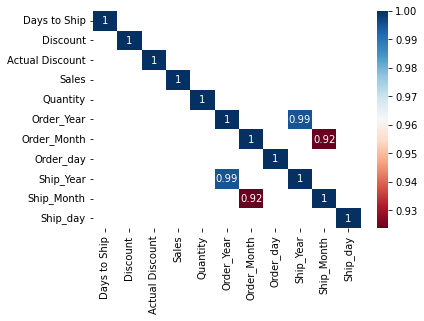

In [92]:
sns.heatmap(corr, annot=True, cmap='RdBu')

#### Inference:-
Order_Year and Order_Month are highly correlated with Ship_Year and Ship_Month respectively.Either of them from both group can be removed from the dataset.

In [93]:
X_train.drop(columns=['Order_Year', 'Order_Month'], axis=1, inplace=True)
X_test.drop(columns=['Order_Year', 'Order_Month'], axis=1, inplace=True)
X.drop(columns=['Order_Year', 'Order_Month'], axis=1, inplace=True)

In [94]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6436, 18)
(1609, 18)
(6436,)
(1609,)


#### Encoding the categorical variables using ColumnTransformer

In [95]:
ohe=OneHotEncoder(drop='first', sparse=False, dtype='int32')

In [96]:
norm=StandardScaler()

#### Create Pipeline using linear regeressor

In [97]:
trf=ColumnTransformer(transformers=[('transf', ohe, [0, 1, 2, 3, 4, 5, 11, 12, 17],),
                                    ('norm', norm, [6, 7, 8, 9, 10, 13, 14, 15, 16])], 
                                   remainder='passthrough')
lr=LinearRegression()

pipe1=Pipeline([('step1', trf), 
               ('step2', lr)])

pipe1.fit(X_train, y_train)

ypred=pipe1.predict(X_test)

reg_eval_met(y_test, ypred)

mscore(pipe1)

mean squared error : 1082.4795967065165
Root mean squared error : 32.901057683705496
mean absolute error : 23.473269338398826
R2 Score : 0.49541360512608923
Training Score : 0.5274598746764512
Testing Score : 0.49541360512608923


#### Create Pipeline using lasso regeressor

In [98]:
trf=ColumnTransformer(transformers=[('transf', ohe, [0, 1, 2, 3, 4, 5, 11, 12, 17],),
                                    ('norm', norm, [6, 7, 8, 9, 10, 13, 14, 15, 16])], 
                                   remainder='passthrough')

la=Lasso(alpha=0.01)

pipe2=Pipeline([('step1', trf), 
               ('step2', la)])

pipe2.fit(X_train, y_train)

ypred=pipe2.predict(X_test)

reg_eval_met(y_test, ypred)

mscore(pipe2)

mean squared error : 1082.2984390498432
Root mean squared error : 32.898304501141745
mean absolute error : 23.47064025780714
R2 Score : 0.4954980498483387
Training Score : 0.5273742969988472
Testing Score : 0.4954980498483387


#### Create Pipeline using ridge regeressor

In [99]:
trf=ColumnTransformer(transformers=[('transf', ohe, [0, 1, 2, 3, 4, 5, 11, 12, 17],),
                                    ('norm', norm, [6, 7, 8, 9, 10, 13, 14, 15, 16])], 
                                   remainder='passthrough')

r=Ridge(alpha=1)

pipe3=Pipeline([('step1', trf), 
               ('step2', r)])

pipe3.fit(X_train, y_train)

ypred=pipe3.predict(X_test)

reg_eval_met(y_test, ypred)

mscore(pipe3)

mean squared error : 1082.463120803168
Root mean squared error : 32.900807297134335
mean absolute error : 23.474028896176307
R2 Score : 0.49542128519386897
Training Score : 0.5274581738460948
Testing Score : 0.49542128519386897


#### Create Pipeline using DecisionTree Regeressor

In [100]:
trf=ColumnTransformer(transformers=[('transf', ohe, [0, 1, 2, 3, 4, 5, 11, 12, 17],),
                                    ('norm', norm, [6, 7, 8, 9, 10, 13, 14, 15, 16])], 
                                   remainder='passthrough')


dt=DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_split=13, random_state=0)

pipe4=Pipeline([('step1', trf), 
               ('step2', dt)])

pipe4.fit(X_train, y_train)

ypred=pipe4.predict(X_test)

reg_eval_met(y_test, ypred)

mscore(pipe4)

mean squared error : 889.8784295817518
Root mean squared error : 29.83083018592932
mean absolute error : 19.118071609261378
R2 Score : 0.58519259852576
Training Score : 0.647669713341118
Testing Score : 0.58519259852576


#### Create Pipeline using Randomforest Regeressor

In [101]:
trf=ColumnTransformer(transformers=[('transf', ohe, [0, 1, 2, 3, 4, 5, 11, 12, 17],),
                                    ('norm', norm, [6, 7, 8, 9, 10, 13, 14, 15, 16])], 
                                   remainder='passthrough')

rf=RandomForestRegressor( n_estimators=100,
    criterion='mse',
    max_depth=9,
    min_samples_split=15, random_state=0)

pipe5=Pipeline([('step1', trf), 
               ('step2', rf)])

pipe5.fit(X_train, y_train)

ypred=pipe5.predict(X_test)

reg_eval_met(y_test, ypred)

mscore(pipe5)

mean squared error : 878.9702453054622
Root mean squared error : 29.647432356031477
mean absolute error : 18.767067866878072
R2 Score : 0.5902773330513249
Training Score : 0.7487403019835281
Testing Score : 0.5902773330513249


#### Create Pipeline using Bagging Regeressor

In [102]:
trf=ColumnTransformer(transformers=[('transf', ohe, [0, 1, 2, 3, 4, 5, 11, 12, 17],),
                                    ('norm', norm, [6, 7, 8, 9, 10, 13, 14, 15, 16])], 
                                   remainder='passthrough')

bg=BaggingRegressor( base_estimator=rf,
    n_estimators=200,
    max_samples=X_train.shape[0],
    max_features=X_train.shape[1], random_state=0)

pipe6=Pipeline([('step1', trf), 
               ('step2', bg)])

pipe6.fit(X_train, y_train)

ypred=pipe6.predict(X_test)

reg_eval_met(y_test, ypred)

mscore(pipe6)

mean squared error : 1007.1231008276501
Root mean squared error : 31.735202864132603
mean absolute error : 23.12944401731005
R2 Score : 0.5305402372598836
Training Score : 0.6058444558469271
Testing Score : 0.5305402372598836


#### Create Pipeline using Kneighbors Regeressor

In [103]:
trf=ColumnTransformer(transformers=[('transf', ohe, [0, 1, 2, 3, 4, 5, 11, 12, 17],),
                                    ('norm', norm, [6, 7, 8, 9, 10, 13, 14, 15, 16])], 
                                   remainder='passthrough')

knn=KNeighborsRegressor(n_neighbors=13)
pipe7=Pipeline([('step1', trf), 
               ('step2', knn)])

pipe7.fit(X_train, y_train)

ypred=pipe7.predict(X_test)

reg_eval_met(y_test, ypred)

mscore(pipe7)

mean squared error : 1021.3913599905856
Root mean squared error : 31.95921400770966
mean absolute error : 22.40684610603815
R2 Score : 0.5238892394267076
Training Score : 0.6219928280028402
Testing Score : 0.5238892394267076


#### Interference:-
RandomForestRegressor Model would be the best model for predicting profit on an order.

In [104]:
import pickle

In [105]:
pickle.dump(pipe5, open('rf3.pkl', 'wb'))     # Saving the best performing model
pickle.dump(df2, open('data2.pkl', 'wb'))      # Saving the dataframe
pickle.dump(X, open('Independent_features1.pkl', 'wb'))    # Saving the dataframe Independent features